In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

import statsmodels.api as sm

In [4]:
df = pd.read_csv("LCData.csv")
df

,Unnamed: 0,def_flag,loan_amnt,int_rate,grade,emp_length_p,home_ownership,annual_inc,verification_status,purpose_p,...,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,open_acc,total_acc,total_rev_hi_lim,pub_rec,pub_rec_bankruptcies,addr_state,issue_d
0,70734,False,19000,10.15,2,4.0,MORTGAGE,90000.0,Not Verified,debt_consolidation,...,4,6,5,14,45,41500,0,0,NY,Oct-2014
1,166156,False,31500,17.57,4,10.0,MORTGAGE,145000.0,Verified,debt_consolidation,...,4,6,6,11,25,80100,0,0,MD,May-2014
2,201744,False,11975,14.64,3,4.0,MORTGAGE,45000.0,Source Verified,debt_consolidation,...,1,4,1,7,34,11000,0,0,IL,Mar-2014
3,166242,False,9000,14.16,3,10.0,RENT,48000.0,Source Verified,other,...,3,6,3,9,16,35700,1,1,NY,May-2014
4,141351,False,6600,6.03,1,0.0,RENT,58000.0,Not Verified,credit_card,...,4,4,4,9,28,37200,0,0,TX,Jun-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157080,117769,False,6500,11.67,2,8.0,MORTGAGE,30000.0,Not Verified,debt_consolidation,...,4,9,4,12,17,13900,0,0,NC,Jul-2014
157081,136544,False,19200,16.99,4,10.0,MORTGAGE,250700.0,Source Verified,debt_consolidation,...,1,8,2,16,33,208500,0,0,KS,Jun-2014
157082,35225,False,6500,11.67,2,10.0,MORTGAGE,46000.0,Source Verified,credit_card,...,2,3,3,9,25,32800,0,0,TX,Oct-2014
157083,76486,False,10000,12.99,3,2.0,MORTGAGE,40000.0,Not Verified,credit_card,...,6,10,6,19,33,20400,0,0,IL,Sep-2014


In [40]:
df['addr_state'].value_counts()

CA    21250
NY    12654
TX    12120
FL     9796
IL     6112
NJ     5620
PA     5335
OH     4955
GA     4814
VA     4476
NC     4042
MI     3798
MD     3524
AZ     3456
MA     3429
WA     3228
CO     3175
MN     2697
IN     2658
TN     2486
MO     2353
CT     2208
NV     1980
WI     1976
AL     1873
SC     1846
LA     1778
OR     1775
KY     1487
KS     1378
OK     1326
AR     1108
UT     1088
NM      828
WV      779
NH      754
MS      750
HI      748
RI      659
MT      455
DE      430
DC      425
AK      370
WY      369
VT      350
SD      313
IA        1
ME        1
Name: addr_state, dtype: int64

In [5]:
df["emp_length_p"].value_counts()

10.0    53068
2.0     13613
3.0     12168
0.0     11942
1.0      9802
4.0      9066
7.0      8727
5.0      8660
6.0      7898
8.0      7804
9.0      6289
Name: emp_length_p, dtype: int64

In [6]:
df = df.dropna()

In [7]:
df2 = df[['loan_amnt', 'emp_length_p', 'home_ownership', 'annual_inc', 'purpose_p', 'avg_cur_bal', 'def_flag']].copy()

In [8]:
df2

,loan_amnt,emp_length_p,home_ownership,annual_inc,purpose_p,avg_cur_bal,def_flag
0,19000,4.0,MORTGAGE,90000.0,debt_consolidation,10627.0,False
1,31500,10.0,MORTGAGE,145000.0,debt_consolidation,35563.0,False
2,11975,4.0,MORTGAGE,45000.0,debt_consolidation,26828.0,False
3,9000,10.0,RENT,48000.0,other,3197.0,False
4,6600,0.0,RENT,58000.0,credit_card,13183.0,False
...,...,...,...,...,...,...,...
157080,6500,8.0,MORTGAGE,30000.0,debt_consolidation,11059.0,False
157081,19200,10.0,MORTGAGE,250700.0,debt_consolidation,40228.0,False
157082,6500,10.0,MORTGAGE,46000.0,credit_card,27473.0,False
157083,10000,2.0,MORTGAGE,40000.0,credit_card,7310.0,False


(array([ 9296., 21319., 27960., 21514., 19007., 18832.,  8278.,  9644.,
         4833.,  8350.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <BarContainer object of 10 artists>)

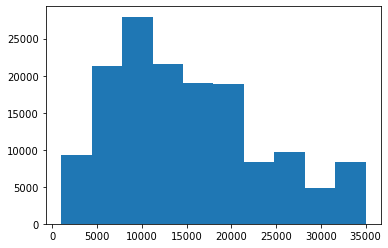

In [9]:
plt.hist(df2['loan_amnt'])

In [10]:
df2['log_loan_amnt'] = np.log(df2['loan_amnt'])

(array([1.4425e+05, 4.2850e+03, 3.9000e+02, 6.5000e+01, 1.9000e+01,
        1.4000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([     0. ,  49748.4,  99496.8, 149245.2, 198993.6, 248742. ,
        298490.4, 348238.8, 397987.2, 447735.6, 497484. ]),
 <BarContainer object of 10 artists>)

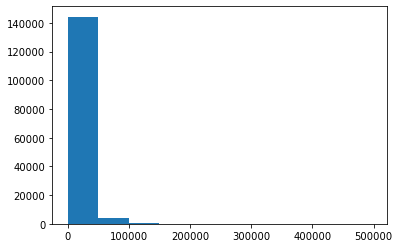

In [11]:
plt.hist(df2['avg_cur_bal'])

In [12]:
df2['log_avg_cur_bal'] = np.log(df2['avg_cur_bal'], out=np.zeros_like(df2['avg_cur_bal']), where=(df2['avg_cur_bal']!=0))

(array([1.48985e+05, 4.20000e+01, 4.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([4.0000e+03, 7.5360e+05, 1.5032e+06, 2.2528e+06, 3.0024e+06,
        3.7520e+06, 4.5016e+06, 5.2512e+06, 6.0008e+06, 6.7504e+06,
        7.5000e+06]),
 <BarContainer object of 10 artists>)

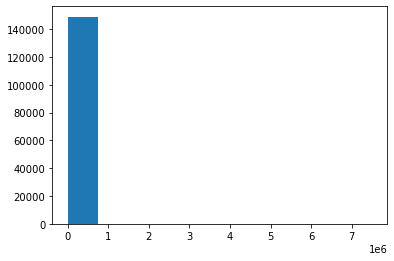

In [13]:
plt.hist(df2['annual_inc'])

In [14]:
df2['log_annual_inc'] = np.log(df2['annual_inc'], out=np.zeros_like(df2['annual_inc']), where=(df2['annual_inc']!=0))

,loan_amnt,emp_length_p,home_ownership,annual_inc,purpose_p,avg_cur_bal,def_flag,log_loan_amnt,log_avg_cur_bal,log_annual_inc
0,19000,4.0,MORTGAGE,90000.0,debt_consolidation,10627.0,False,9.852194,9.271153,11.407565
1,31500,10.0,MORTGAGE,145000.0,debt_consolidation,35563.0,False,10.357743,10.479061,11.884489
2,11975,4.0,MORTGAGE,45000.0,debt_consolidation,26828.0,False,9.390576,10.197201,10.714418
3,9000,10.0,RENT,48000.0,other,3197.0,False,9.104980,8.069968,10.778956
4,6600,0.0,RENT,58000.0,credit_card,13183.0,False,8.794825,9.486683,10.968198
...,...,...,...,...,...,...,...,...,...,...
157080,6500,8.0,MORTGAGE,30000.0,debt_consolidation,11059.0,False,8.779557,9.311000,10.308953
157081,19200,10.0,MORTGAGE,250700.0,debt_consolidation,40228.0,False,9.862666,10.602319,12.432012
157082,6500,10.0,MORTGAGE,46000.0,credit_card,27473.0,False,8.779557,10.220959,10.736397
157083,10000,2.0,MORTGAGE,40000.0,credit_card,7310.0,False,9.210340,8.896999,10.596635


(array([11942.,  9799., 13613., 12168.,  9066.,  8660.,  7898.,  8727.,
         7804., 59356.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

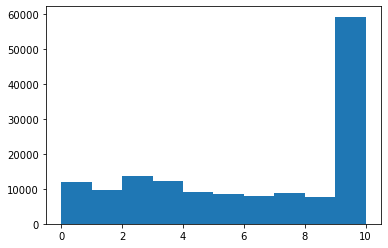

In [16]:
plt.hist(df2['emp_length_p'])

In [17]:
df2['mortgage'] = df2['home_ownership'].map({"MORTGAGE": 1, "RENT":0, "OWN":0, "OTHER":0})

In [18]:
df2['rent'] = df2['home_ownership'].map({"MORTGAGE": 0, "RENT":1, "OWN":0, "OTHER":0})

In [19]:
df2['other'] = df2['home_ownership'].map({"MORTGAGE": 0, "RENT":0, "OWN":0, "OTHER":1})

In [20]:
df2['purpose_p'].value_counts()

debt_consolidation    90895
credit_card           35063
home_improvement       8068
other                  7001
major_purchase         2411
medical                1472
small_business         1451
car                    1143
moving                  791
vacation                738
Name: purpose_p, dtype: int64

In [21]:
# df_purpose = pd.get_dummies(df2["purpose_p"])
# df2 = pd.concat([df2, df_purpose], axis=1)


In [22]:
df2['debt_consolidation'] = df2['purpose_p'].map({'debt_consolidation':1,
                                                 'credit_card':0,
                                                 'home_improvement':0,
                                                 'other':0,
                                                 'major_purchase':0,
                                                 'medical':0,
                                                 'small_business':0,
                                                 'car':0,
                                                 'moving':0,
                                                 'vacation':0})

In [23]:
df2['credit_card'] = df2['purpose_p'].map({'debt_consolidation':0,
                                                 'credit_card':1,
                                                 'home_improvement':0,
                                                 'other':0,
                                                 'major_purchase':0,
                                                 'medical':0,
                                                 'small_business':0,
                                                 'car':0,
                                                 'moving':0,
                                                 'vacation':0})

In [24]:
df2['def_flag'] = df2['def_flag'].map({False:0, True:1})

In [25]:
df2.head()

,loan_amnt,emp_length_p,home_ownership,annual_inc,purpose_p,avg_cur_bal,def_flag,log_loan_amnt,log_avg_cur_bal,log_annual_inc,mortgage,rent,other,debt_consolidation,credit_card
0,19000,4.0,MORTGAGE,90000.0,debt_consolidation,10627.0,0,9.852194,9.271153,11.407565,1,0,0,1,0
1,31500,10.0,MORTGAGE,145000.0,debt_consolidation,35563.0,0,10.357743,10.479061,11.884489,1,0,0,1,0
2,11975,4.0,MORTGAGE,45000.0,debt_consolidation,26828.0,0,9.390576,10.197201,10.714418,1,0,0,1,0
3,9000,10.0,RENT,48000.0,other,3197.0,0,9.104980,8.069968,10.778956,0,1,0,0,0
4,6600,0.0,RENT,58000.0,credit_card,13183.0,0,8.794825,9.486683,10.968198,0,1,0,0,1


In [26]:
df2 = df2.drop(['loan_amnt', 'home_ownership', 'annual_inc', 'purpose_p', 'avg_cur_bal'], axis=1)


In [27]:
df2 = df2[['def_flag', 'emp_length_p', 'log_loan_amnt', 'log_avg_cur_bal',
       'log_annual_inc', 'mortgage', 'rent', 'other', 'debt_consolidation',
       'credit_card']]
df2

,def_flag,emp_length_p,log_loan_amnt,log_avg_cur_bal,log_annual_inc,mortgage,rent,other,debt_consolidation,credit_card
0,0,4.0,9.852194,9.271153,11.407565,1,0,0,1,0
1,0,10.0,10.357743,10.479061,11.884489,1,0,0,1,0
2,0,4.0,9.390576,10.197201,10.714418,1,0,0,1,0
3,0,10.0,9.104980,8.069968,10.778956,0,1,0,0,0
4,0,0.0,8.794825,9.486683,10.968198,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
157080,0,8.0,8.779557,9.311000,10.308953,1,0,0,1,0
157081,0,10.0,9.862666,10.602319,12.432012,1,0,0,1,0
157082,0,10.0,8.779557,10.220959,10.736397,1,0,0,0,1
157083,0,2.0,9.210340,8.896999,10.596635,1,0,0,0,1


In [28]:
df2_emp_10 = df2[:][df2.emp_length_p == 10.0]

In [29]:
df2_emp_10.head()

,def_flag,emp_length_p,log_loan_amnt,log_avg_cur_bal,log_annual_inc,mortgage,rent,other,debt_consolidation,credit_card
1,0,10.0,10.357743,10.479061,11.884489,1,0,0,1,0
3,0,10.0,9.104980,8.069968,10.778956,0,1,0,0,0
5,0,10.0,9.210340,7.760467,10.085809,0,1,0,1,0
16,0,10.0,9.798127,9.949846,12.100712,1,0,0,1,0
17,0,10.0,10.308953,8.666647,11.225243,0,0,0,1,0


In [30]:
df2_emp_other = df2[:][df2.emp_length_p != 10.0]

In [31]:
#df2_emp_other.to_csv('df_emp_other.csv')

In [32]:
#df2_emp_10.to_csv('df_emp_10.csv')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df2_emp_other.drop('def_flag', axis=1),
                                                    df2_emp_other['def_flag'],
                                                    test_size=0.33)

In [34]:
Model1 = LogisticRegression(solver='sag') # googled the most suitable solver for large dataset
Model1.fit(X_train, y_train)

LogisticRegression(solver='sag')

In [35]:
Model1.score(X_test, y_test)

0.8772616754554927

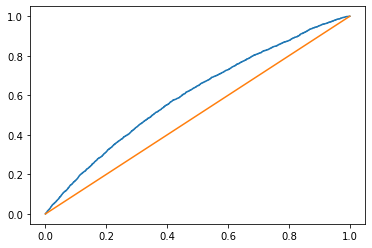

In [36]:
y_pred_prob = Model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,2), np.linspace(0,1,2))

In [37]:
auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

0.6014001436484511